In [123]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [2]:
child_birth = pd.read_csv('Childbirths.csv')

In [216]:
child_birth.isnull().sum()

ID             0
Length         0
Birthweight    0
Headcirc       0
Gestation      0
smoker         0
mage           0
mnocig         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
dtype: int64

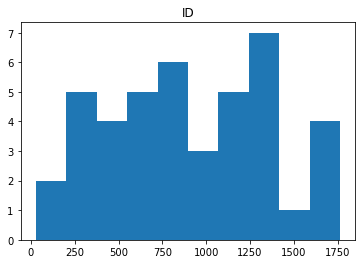

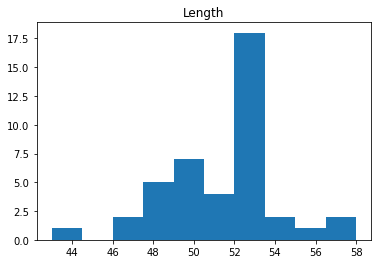

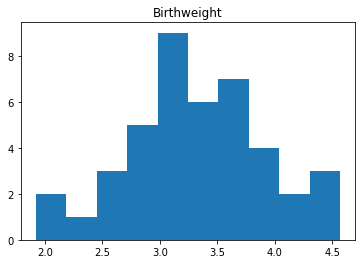

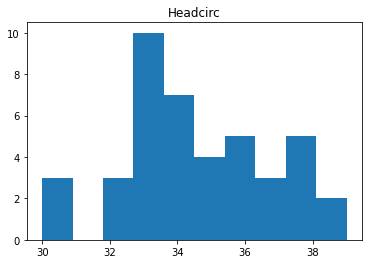

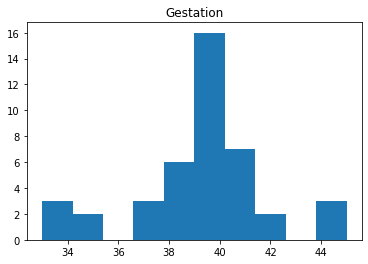

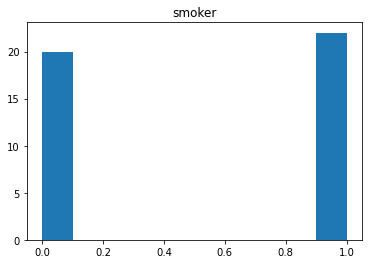

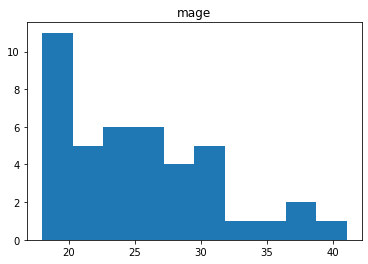

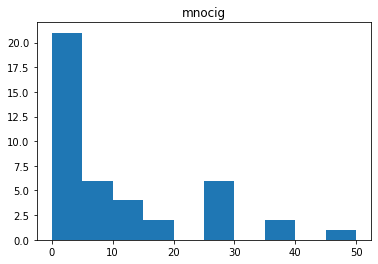

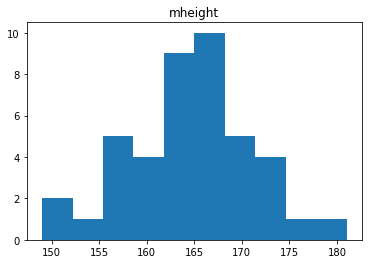

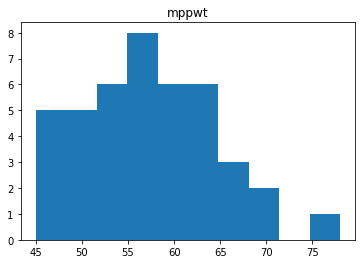

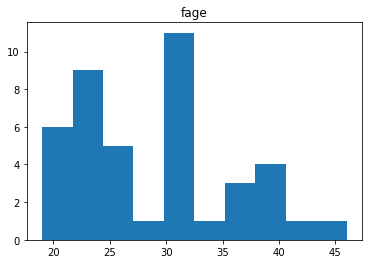

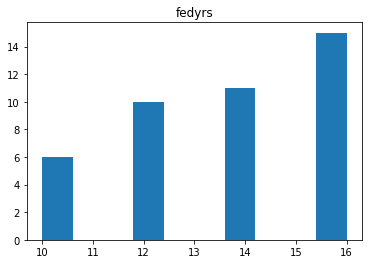

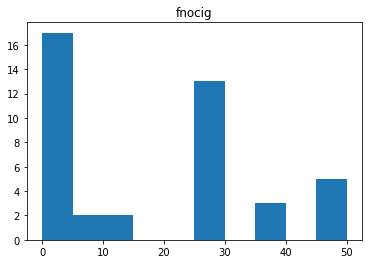

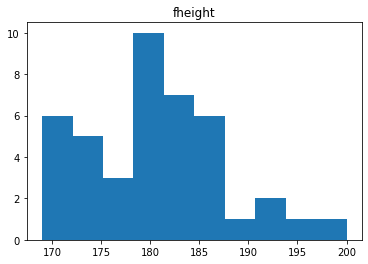

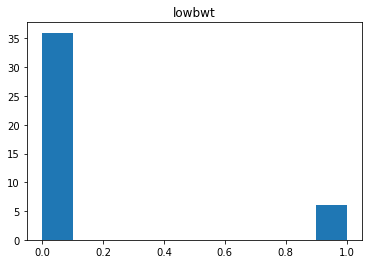

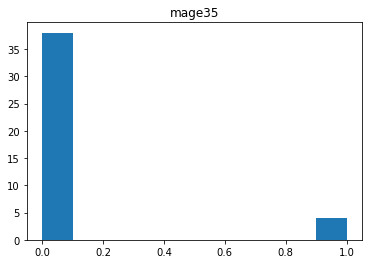

In [226]:
for i in child_birth.columns:
    plt.figure()
#     print(i)
    try:
        
        plt.hist(child_birth[i])
        plt.title(i)
    except:
        pass

<AxesSubplot:>

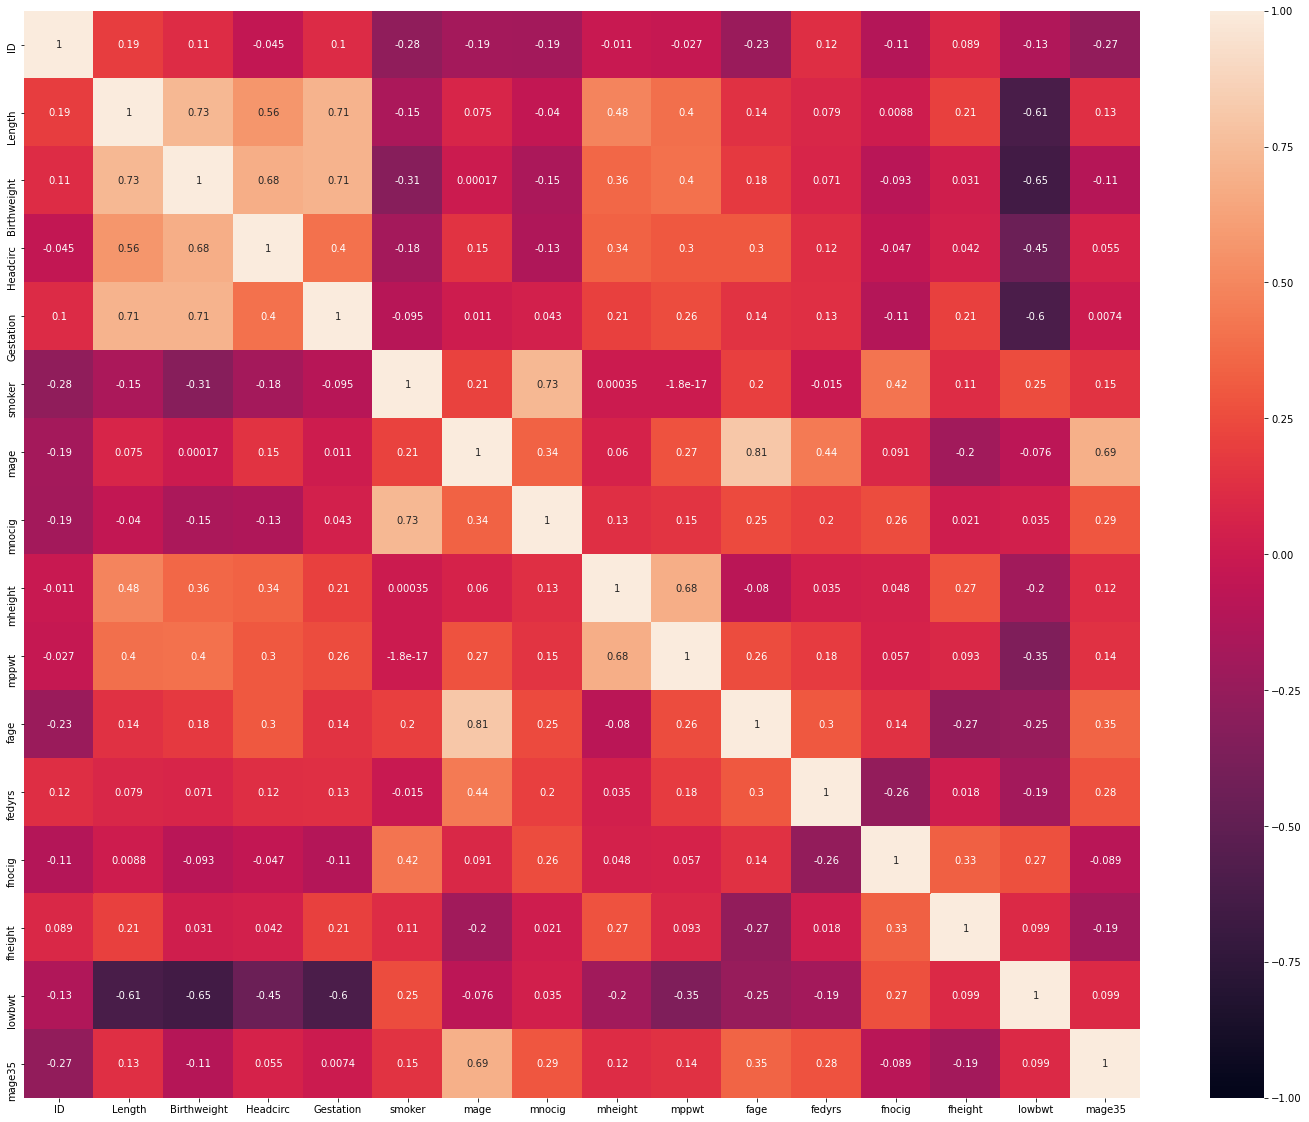

In [12]:
plt.figure(figsize=(25, 20))
sns.heatmap(child_birth.corr(), vmin=-1, vmax=1, annot=True)

In [7]:
target = child_birth['lowbwt']

In [13]:
cols_to_drop=['mage', 'mnocig', 'Length','Birthweight', 'lowbwt', 'mppwt']
feature_df = child_birth.drop(columns=cols_to_drop)

<AxesSubplot:>

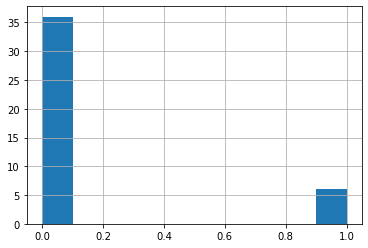

In [14]:
target.hist()

In [17]:
scaler = StandardScaler()# Fit on training set only.
scaler.fit(feature_df)
train_img = scaler.transform(feature_df)


In [20]:
scaled_features = pd.DataFrame(train_img, columns = feature_df.columns)
scaled_features

,ID,Headcirc,Gestation,smoker,mheight,fage,fedyrs,fnocig,fheight,mage35
0,1.008469,-0.251044,1.841546,-1.048809,-0.381625,-0.870695,-1.717911,1.041439,-0.217561,-0.324443
1,0.263906,0.592464,0.309963,-1.048809,1.018903,-1.460521,-0.780869,-1.005240,0.362602,-0.324443
2,-0.935188,1.857726,0.692859,-1.048809,1.174517,0.308956,1.093216,0.456674,0.652683,3.082207
3,0.634023,1.435972,1.841546,-1.048809,1.485746,-0.428326,0.156174,0.456674,1.232846,-0.324443
4,-0.738225,1.014218,1.075754,-1.048809,1.641360,0.161500,-0.780869,-1.005240,0.507643,-0.324443
5,1.605851,1.435972,-0.455828,-1.048809,0.085217,0.308956,1.093216,-1.005240,-0.072520,-0.324443
6,-0.160322,-0.251044,0.309963,-1.048809,-1.159697,0.308956,1.093216,-1.005240,-1.087806,-0.324443
7,0.642681,-0.672798,1.075754,-1.048809,0.085217,-1.165608,-1.717911,0.456674,0.652683,-0.324443
8,0.404593,1.435972,-0.455828,-1.048809,1.174517,-1.313065,-0.780869,-0.595904,-1.232846,-0.324443
9,-0.155993,0.170710,-0.455828,-1.048809,-1.159697,-1.018152,0.156174,-1.005240,-0.217561,-0.324443


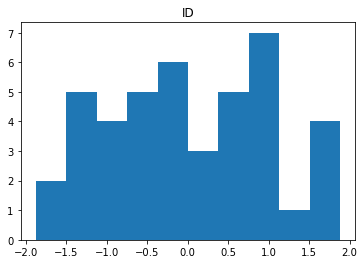

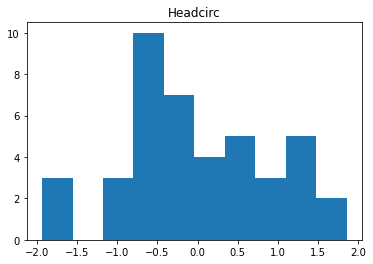

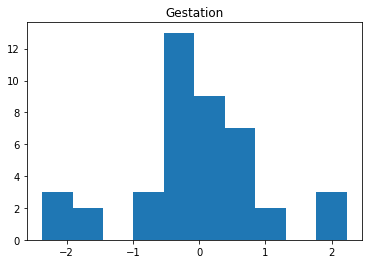

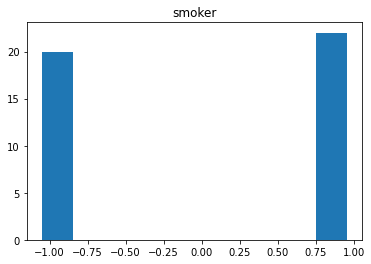

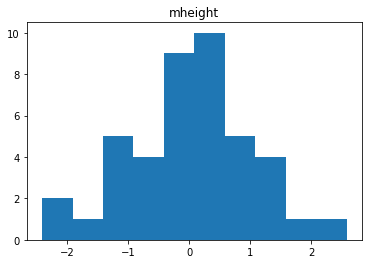

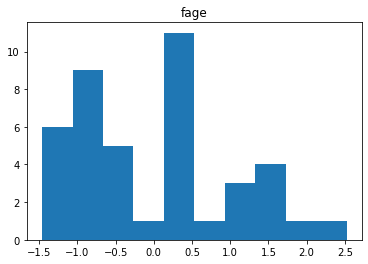

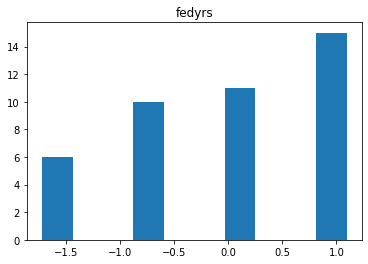

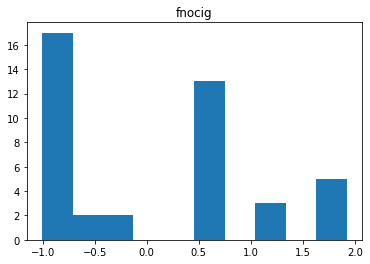

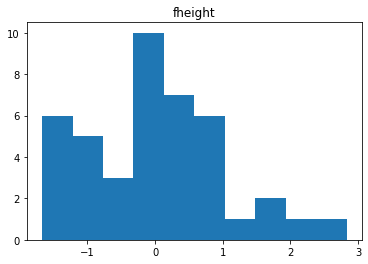

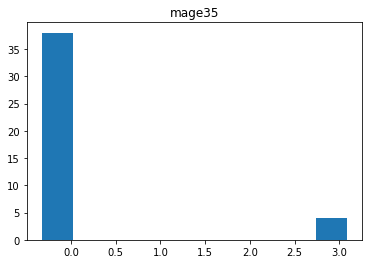

In [218]:
for i in scaled_features.columns:
    plt.figure()
#     print(i)
    try:
        
        plt.hist(scaled_features[i])
        plt.title(i)
    except:
        pass

In [37]:
target.value_counts()

0    36
1     6
Name: lowbwt, dtype: int64

In [252]:
temp = sm.add_constant(scaled_features)

In [253]:
# lg_model_non_weight = LogisticRegression(random_state=13)
logit_model = sm.Logit( target, temp, random_state=13,).fit()

PerfectSeparationError: Perfect separation detected, results not available

In [129]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 lowbwt   No. Observations:                   42
Model:                          Logit   Df Residuals:                       32
Method:                           MLE   Df Model:                            9
Date:                Tue, 11 May 2021   Pseudo R-squ.:                 -0.2910
Time:                        14:21:30   Log-Likelihood:                -22.237
converged:                       True   LL-Null:                       -17.225
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID            -0.1234      0.444     -0.278      0.781      -0.994       0.747
Headcirc      -0.2593      0.459     -0.565      0.572      -1.158       0.640
Gestation     -1.0253      0.515     -1.992      0.046      -2.034      -0.017
smoker         0.1928      0.421      0.458      0.647      -0.632       1.017
mheight       -0.2577      0.413     -0.624      0.532      -1.066       0.551
fage          -0.4691      0.491     -0.955      0.339      -1.432       0.493
fedyrs        -0.1674      0.425     -0.394      0.694      -1.001       0.666
fnocig         0.3259      0.475      0.686      0.493      -0.605       1.257
fheight        0.2905      0.450      0.646      0.518      -0.591       1.172
mage35         0.4879      0.423      1.152      0.249      -0.342       1.318
==============================================================================
"""

In [46]:
lg_model_non_weight.fit(scaled_features, target)

LogisticRegression(random_state=13)

In [47]:
y_pred_non = lg_model_non_weight.predict(scaled_features)

In [105]:
from sklearn import metrics
print(metrics.classification_report(target, y_pred_non))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.83      0.91         6

    accuracy                           0.98        42
   macro avg       0.99      0.92      0.95        42
weighted avg       0.98      0.98      0.98        42



In [246]:
pd.DataFrame(metrics.confusion_matrix( target, y_pred_non))

,0,1
0,36,0
1,1,5


In [247]:
lg_model_weight = LogisticRegression(random_state=13, class_weight={0: 1, 1: 6})
lg_model_weight.fit(scaled_features, target)
y_pred = lg_model_weight.predict(scaled_features)

In [248]:
print(metrics.classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        36
           1       0.67      1.00      0.80         6

    accuracy                           0.93        42
   macro avg       0.83      0.96      0.88        42
weighted avg       0.95      0.93      0.93        42



In [249]:
pd.DataFrame(metrics.confusion_matrix( target, y_pred))

,0,1
0,33,3
1,0,6


In [156]:
logit_model_V2 = sm.Logit( target, scaled_features.drop(columns=['ID', 'Headcirc', 'fedyrs','fheight', 'smoker', 'mheight', 'mage35', 'fage', 'fnocig']), random_state=13, class_weight={0: 1, 1: 6}).fit()

Optimization terminated successfully.
         Current function value: 0.592577
         Iterations 6


In [157]:
logit_model_V2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 lowbwt   No. Observations:                   42
Model:                          Logit   Df Residuals:                       41
Method:                           MLE   Df Model:                            0
Date:                Tue, 11 May 2021   Pseudo R-squ.:                 -0.4449
Time:                        14:30:18   Log-Likelihood:                -24.888
converged:                       True   LL-Null:                       -17.225
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gestation     -1.0925      0.452     -2.420      0.016      -1.978      -0.208
==============================================================================
"""

In [254]:
test_pred = logit_model_V2.predict(scaled_features.drop(columns=['ID', 'Headcirc', 'fedyrs','fheight', 'smoker', 'mheight', 'mage35', 'fage', 'fnocig']))

In [257]:
preds = np.where(test_pred>0.8,1,0)

In [258]:
print(metrics.classification_report(target, preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.80      0.67      0.73         6

    accuracy                           0.93        42
   macro avg       0.87      0.82      0.84        42
weighted avg       0.93      0.93      0.93        42



In [259]:
pd.DataFrame(metrics.confusion_matrix( target, preds))

,0,1
0,35,1
1,2,4


In [75]:
scaled_features.shape

(42, 10)

In [87]:
pca = PCA() # estimate PCs
scaled_sel_features = pca.fit_transform(scaled_features)

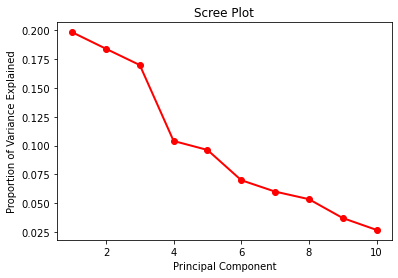

In [88]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [283]:
pca = PCA(n_components=2) # estimate PCs
scaled_sel_features = pca.fit_transform(scaled_features)
print(np.round(pca.explained_variance_ratio_, 2))
np.sum(pca.explained_variance_ratio_)

[0.2  0.18]


0.38179608605640286

In [284]:
principalDf = pd.DataFrame(data = scaled_sel_features
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, target], axis = 1)

In [276]:
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,lowbwt
0,-1.192600,-1.207209,-0.585393,-0.996914,-1.055613,0
1,-0.631557,-1.964336,-0.207665,-0.953800,1.146621,0
2,3.181363,-0.372122,-0.869014,-0.147252,1.590238,0
3,0.824032,-2.472070,-1.974652,-0.262560,-0.076358,0
4,0.906127,-1.646828,-0.842158,-1.605950,0.780445,0


In [287]:
lg_model_weight_sel = LogisticRegression(random_state=13, class_weight={0: 1, 1: 6})
lg_model_weight_sel.fit(scaled_sel_features, target)
y_pred_sel = lg_model_weight_sel.predict(scaled_sel_features)

In [288]:
print(metrics.classification_report(target, y_pred_sel))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        36
           1       0.50      0.83      0.62         6

    accuracy                           0.86        42
   macro avg       0.73      0.85      0.77        42
weighted avg       0.90      0.86      0.87        42



In [289]:
lg_model_weight_sel.score(scaled_sel_features, target)

0.8571428571428571

In [291]:
pd.DataFrame(metrics.confusion_matrix(target, y_pred_sel))

,0,1
0,31,5
1,1,5


In [245]:
preds_v2 = np.where(test_pred_v2>0.75,1,0)
pd.DataFrame(metrics.confusion_matrix( target, preds_v2))

,0,1
0,34,2
1,2,4


In [210]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
lg_model_cv = LogisticRegression(random_state=13, class_weight={0: 1, 1: 6})
scores = cross_val_score(lg_model_cv, scaled_sel_features, target, scoring='accuracy', cv=cv, n_jobs=-1)

In [211]:
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.800 (0.222)


In [212]:
scores

array([0.6 , 0.4 , 1.  , 0.5 , 1.  , 1.  , 0.75, 1.  , 0.75, 1.  ])

In [213]:
np.array(test_pred)

array([0.117951  , 0.41613749, 0.31930187, 0.117951  , 0.23589578,
       0.6219926 , 0.41613749, 0.23589578, 0.6219926 , 0.6219926 ,
       0.31930187, 0.41613749, 0.6219926 , 0.31930187, 0.41613749,
       0.71429711, 0.51991004, 0.89764642, 0.51991004, 0.93019412,
       0.41613749, 0.31930187, 0.71429711, 0.51991004, 0.71429711,
       0.85233215, 0.93019412, 0.31930187, 0.41613749, 0.41613749,
       0.6219926 , 0.51991004, 0.51991004, 0.08089038, 0.51991004,
       0.31930187, 0.41613749, 0.51991004, 0.6219926 , 0.31930187,
       0.85233215, 0.41613749])

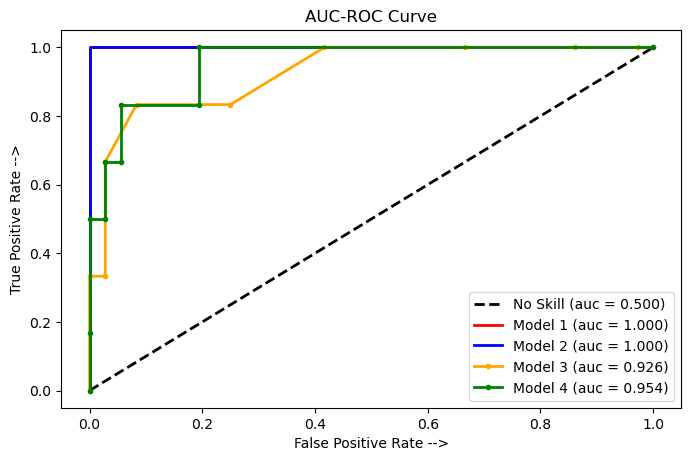

In [292]:

ns_probs = [0 for _ in range(len(target))]
# predict probabilities
non_weight_probs = lg_model_non_weight.predict_proba(scaled_features)
weight_probs = lg_model_weight.predict_proba(scaled_features)
sel_weight_probs = lg_model_weight_sel.predict_proba(scaled_sel_features)


# keep probabilities for the positive outcome only
non_weight_probs = non_weight_probs[:, 1]
weight_probs = weight_probs[:, 1]
sel_weight_probs = sel_weight_probs[:, 1]
lg_stats_probs = np.array(test_pred)

ns_auc = metrics.roc_auc_score(target, ns_probs)
nw_auc = metrics.roc_auc_score(target, non_weight_probs)
w_auc = metrics.roc_auc_score(target, weight_probs)
sw_auc = metrics.roc_auc_score(target, sel_weight_probs)
st_lg_auc = metrics.roc_auc_score(target, lg_stats_probs)

ns_fpr, ns_tpr, _ = metrics.roc_curve(target, ns_probs)
nw_fpr, nw_tpr, _ = metrics.roc_curve(target, non_weight_probs)
w_fpr, w_tpr, _ = metrics.roc_curve(target, weight_probs)
sw_fpr, sw_tpr, _ = metrics.roc_curve(target, sel_weight_probs)
st_lg_fpr, st_lg_tpr, _ = metrics.roc_curve(target, lg_stats_probs)
plt.figure(figsize=(8,5), dpi=100)

plt.plot(ns_fpr, ns_tpr, linestyle='dashed', linewidth=2, color= 'black', label='No Skill (auc = %0.3f)' % ns_auc)
plt.plot(nw_fpr, nw_tpr, linestyle='-', linewidth=2, color= 'red', label='Model 1 (auc = %0.3f)' % nw_auc)
plt.plot(w_fpr, w_tpr, linestyle='-', linewidth=2, color= 'blue', label='Model 2 (auc = %0.3f)' % w_auc)

plt.plot(st_lg_fpr, st_lg_tpr, marker='.', linewidth=2, color= 'orange', label='Model 3 (auc = %0.3f)' % st_lg_auc)
plt.plot(sw_fpr, sw_tpr, marker='.', linewidth=2, color= 'green', label='Model 4 (auc = %0.3f)' % sw_auc)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("AUC-ROC Curve")
plt.legend()

plt.show()

In [193]:
metrics.roc_curve(target, sel_weight_probs)

(array([0.        , 0.        , 0.        , 0.02777778, 0.02777778,
        0.05555556, 0.05555556, 1.        ]),
 array([0.        , 0.16666667, 0.5       , 0.5       , 0.83333333,
        0.83333333, 1.        , 1.        ]),
 array([1.99758884e+00, 9.97588840e-01, 9.48579235e-01, 9.43206818e-01,
        7.90556430e-01, 6.75964089e-01, 5.62484583e-01, 3.88344130e-04]))